# Análisis Exploratorio y Visualización de Datos

# **Conociendo tus datos**

## Formulación del problema.

Conjunto de datos
https://www.kaggle.com/datasnaek/youtube-new

* **YouTube**, ¿Qué es Youtube?, ¿Qué servicio presta?, ¿Cuál es su modelo de negocio?, ¿Cuál es su cuota de mercado?, ¿Qué otros negocios habilita?
* *¿Tendencias?*: combinación de factores que incluyen la medición de las interacciones de los usuarios (número de vistas, acciones, comentarios y gustos).
* El conjunto de datos es un registro diario de los primeros 200 videos en las tendencias de cada país a lo largo de varios meses.
* Contiene estos datos por 10 países/zonas durante el mismo período de tiempo.
* Los nombres de las categorías se encuentran en un archivo auxiliar `.json`

### Entender el problema

¿Qué es un "problema" en este caso?:

* ¿Análisis comparativo del tipo de videos que se hacen tendencia?
* ¿Análisis comparativo del "sentimiento" en los comentarios entre países y en el tiempo?
* ¿Hay videos que son tendencias en distintos países/zonas? ¿De qué tipo son?
* ¿Por cuánto tiempo un video se mantiene como tendencia?
* ¿Cuánto tarda un video en hacerse tendencia?
* ¿Qué características tiene un vídeo que se convierte en tendencia?

### Elaborar un plan

Para elaborar un plan:

* Hay que tener definido que se quiere resolver.
* Hay que entender la brecha entre los insumos con los que contamos y el objetivo que deseamos lograr.
* ¿Dónde está la brecha?, ¿en los datos?, ¿en nuestro conocimiento?

### Ejecutar el plan

Nuestro plan:

* Tiene una idea central bien definida.
* Tiene que ser flexible y revisarse.
* Puede implicar retroceder y probar variantes.

### Ver hacia atrás

Cualquiera que sea el resultado que obtengamos:

* Entender que hemos logrado.
* Revisar nuestro recorrido.
* Intentar generalizar lo que hemos hecho, ¿cómo aplicaríamos lo que hemos hecho en un nuevo problema?

### Buenas y malas preguntas

## Metadatos.

### Dublin Core

https://www.dublincore.org/

Es el principal resultado de la Dublin Core Metada Initiative por definir el conjunto mínimo común de metadatos que debería tener cualquier "recurso".

Consta de un conjunto básico de 15 valores: Contribuyente, Cobertura, Creador, Fecha, Descripcion, formato, identificador, idioma....

### Tipos de datos

Caracterización del contenido de los datos.

* Numéricos, categóricos, fechas, cadenas de caracteres.
* Formato de almacenamiento interno.
* Frecuencias.

### Estándares

Norma o requisito sobre una tarea técnica repetible.

 * Se aplica a un uso común y repetido de: reglas, condiciones, directrices o características

 * En: productos o procesos y relacionados, métodos de producción, y prácticas de sistemas de gestión relacionadas.

¿Se guardan los datos con un formato consistente internamente?

¿Se guardan con un formato interoperable con otros sistemas de interés?


### Diccionario de datos

* Colección de nombres, definiciones y atributos sobre los elementos de datos que se utilizan o capturan en una base de datos, sistema de información o parte de un proyecto de investigación.

* Describe los significados y propósitos de los elementos de datos dentro del contexto de un proyecto, y proporciona orientación sobre la interpretación, los significados aceptados y la representación. 

* También proporciona metadatos sobre los elementos de datos.

## Carga de Datos

In [1]:
import os

import numpy as np
import pandas as pd

In [4]:
country_codes = []
for dirname, _, filenames in os.walk('../data/trending_youtube/'):
    for filename in filenames:
        print(os.path.join(filename))
        code = filename[:2]
        if not (code in country_codes) and code.isalpha() and code.isupper():
            country_codes.append(code)
country_codes.sort()
country_codes

KRvideos.csv
DEvideos.parquet
trendingMX.db
trendingMX.shelve
INvideos.csv
INvideos.parquet
RUvideos.csv
CAvideos.parquet
IN_category_id.json
.~lock.USvideos.csv#
GB_category_id.json
FRvideos.parquet
USvideos.csv
JPvideos.parquet
CA_category_id.json
FRvideos.csv
JPvideos.csv
USvideos.parquet
RU_category_id.json
DE_category_id.json
MXvideos.parquet
FR_category_id.json
RUvideos.parquet
GBvideos.csv
MXvideos.csv
GBvideos.parquet
KRvideos.parquet
KR_category_id.json
JP_category_id.json
DEvideos.csv
CAvideos.csv
US_category_id.json
MX_category_id.json


['CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU', 'US']

**Formatos tabulares**

In [5]:
df_countries = {}
route = "../data/trending_youtube/"
for code in country_codes:
    print(f"Processing {code}")
    df_countries[code] = pd.read_csv(
        f"{route}{code}videos.csv",
        delimiter=','
    )

Processing CA
Processing DE
Processing FR
Processing GB
Processing IN
Processing JP
Processing KR
Processing MX
Processing RU
Processing US


### Data Frames

In [6]:
df_countries["MX"]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canción del principio se llama “Este espíri...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40446,r63VBOagGAo,18.14.06,Shawn Mendes x Portugal (FPF Official World Cu...,FPFutebolOficial,17,2018-06-13T13:11:56.000Z,"Canal|""Oficial""|""da""|""Federação""|""Portuguesa""|...",653114,65639,547,3826,https://i.ytimg.com/vi/r63VBOagGAo/default.jpg,False,False,False,Portugal's Football Team Official SongLyrics: ...
40447,i7r_kMbyngk,18.14.06,AMLO llegó con su esposa al Tercer Debate en M...,AMX,25,2018-06-13T01:15:08.000Z,"AMLO|""morena""|""política""|""PRI""|""PAN""|""PRD""|""Ló...",121674,3558,58,491,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,False,False,False,AMLO llegó con su esposa al Tercer Debate en M...
40448,_jnwjdMe3Zo,18.14.06,Maire usa una blusa kawaiii ¿adorable o ridícula?,Historias Wink,24,2018-06-13T15:08:53.000Z,"maire|""maire vs el internet""|""maire vs interne...",14067,538,6,90,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,False,False,False,Maire usa una blusa kawaii de Alicia en el paí...
40449,pAH9omNAWA4,18.14.06,La Jefa del Campeón - Capítulo 2 Parte 3/4,Tele Time,22,2018-06-13T02:22:33.000Z,[none],22898,94,11,3,https://i.ytimg.com/vi/pAH9omNAWA4/default.jpg,False,False,False,NaN


### CSV / EXCEL

Los infames formatos que todos conocemos.

### SQL

In [7]:
import sqlite3

conn = sqlite3.connect(f'{route}trendingMX.db')
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS TrendingMX
(video_id TEXT, trending_date TEXT, likes INT, dislikes INT)
''')
conn.commit()
conn.close()

Algo haremos con esto en la próxima sesión.

### PARQUET

https://parquet.apache.org/

El mejor formato *ever* para guardar nuestros datos.

In [8]:
route = "../data/trending_youtube/"
for code in country_codes:
    print(f"Processing {code}")
    df_countries[code].to_parquet(f"{route}{code}videos.parquet")

Processing CA
Processing DE
Processing FR
Processing GB
Processing IN
Processing JP
Processing KR
Processing MX
Processing RU
Processing US


Es necesario instalar `pyarrow` o `fastparquet`.

**Formatos jerárquicos**

### JSON

En las tablas de datos las categorías están en códigos numéricos, podemos obtener los títulos de cada unos de los JSON.

In [9]:
df_cat_MX = pd.read_json(f"{route}MX_category_id.json", )
df_cat_MX

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
5,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
6,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
7,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
8,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
9,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [10]:
import json

with open(f"{route}MX_category_id.json") as f:
    data = json.load(f)
data

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [11]:
type(data)

dict

In [12]:
cats = {}
for item in data['items']:
    cats[item['id']] = item['snippet']['title']
cats

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [13]:
pd.DataFrame().from_dict(cats, orient='index')

,0
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging
22,People & Blogs


### XML

El infame formato plagado de etiquetas.

Requiere herramientas muy particulares para extracción y manejo.

### NoSQL

Al igual que con `sqlite`, Python tiene un motor de bases de datos noSQL en su librería estándar: `shelve`.

In [14]:
import shelve

d = shelve.open(f'{route}trendingMX.shelve')
for code in country_codes:
    d[code] = df_countries[code]
d.close()

In [15]:
d = shelve.open(f'{route}trendingMX.shelve')
d["MX"]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canción del principio se llama “Este espíri...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40446,r63VBOagGAo,18.14.06,Shawn Mendes x Portugal (FPF Official World Cu...,FPFutebolOficial,17,2018-06-13T13:11:56.000Z,"Canal|""Oficial""|""da""|""Federação""|""Portuguesa""|...",653114,65639,547,3826,https://i.ytimg.com/vi/r63VBOagGAo/default.jpg,False,False,False,Portugal's Football Team Official SongLyrics: ...
40447,i7r_kMbyngk,18.14.06,AMLO llegó con su esposa al Tercer Debate en M...,AMX,25,2018-06-13T01:15:08.000Z,"AMLO|""morena""|""política""|""PRI""|""PAN""|""PRD""|""Ló...",121674,3558,58,491,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,False,False,False,AMLO llegó con su esposa al Tercer Debate en M...
40448,_jnwjdMe3Zo,18.14.06,Maire usa una blusa kawaiii ¿adorable o ridícula?,Historias Wink,24,2018-06-13T15:08:53.000Z,"maire|""maire vs el internet""|""maire vs interne...",14067,538,6,90,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,False,False,False,Maire usa una blusa kawaii de Alicia en el paí...
40449,pAH9omNAWA4,18.14.06,La Jefa del Campeón - Capítulo 2 Parte 3/4,Tele Time,22,2018-06-13T02:22:33.000Z,[none],22898,94,11,3,https://i.ytimg.com/vi/pAH9omNAWA4/default.jpg,False,False,False,NaN


## Datos Ordenados (tidy)

 * Cada variable debe ser una columna.
 * Cada observación diferente de cada variable tiene que ser en una fila diferente.
 * Debe haber una tabla distinta para cada "clase" de variable.
 * Si tienes múltiples tablas, debe existir una columna en cada tabla que permita enlazarlas.

En buena medida, la definición de datos ordenados o limpios es lo que nos permite identificar en una primera instancia si un conjunto de datos es "bueno" o "malo".

Los conjuntos de datos son peores en la medida que el procesamiento necesarios para hacerlos *tidy* es mayor.

### Tidy Data y Excel

Con frecuencia encontramos problemas de distinto tipo:

* Correspondencia entre los tipos de datos que necesitamos y los que finalmente se almacenan en cada celda.
* Errores de tipado e incosistencias en las categorías.
* La información no aparece siempre en las mismas posiciones.
* Hay variables que ocupan varias columnas, ej. Sexo en dos columnas diferentes.
* Las observaciones no necesariamente ocupan una sola fila, las celdas fusionadas son nuestros peores enemigos.

### Tidy Data y SQL

Una base de datos normalizada es en lo fundamental un conjunto de datos limpios.

Pero hay un conflicto entre la normalización y las necesidades de cómputo, por eso las bases de datos de los sistemas están en un sitio y las utilizadas para analítica, como los data warehouses o data marts en otro.

## Formatos y codificación.

In [16]:
df_countries["MX"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40451 non-null  object
 1   trending_date           40451 non-null  object
 2   title                   40451 non-null  object
 3   channel_title           40451 non-null  object
 4   category_id             40451 non-null  int64 
 5   publish_time            40451 non-null  object
 6   tags                    40451 non-null  object
 7   views                   40451 non-null  int64 
 8   likes                   40451 non-null  int64 
 9   dislikes                40451 non-null  int64 
 10  comment_count           40451 non-null  int64 
 11  thumbnail_link          40451 non-null  object
 12  comments_disabled       40451 non-null  bool  
 13  ratings_disabled        40451 non-null  bool  
 14  video_error_or_removed  40451 non-null  bool  
 15  de

### Fecha y hora

* El iso8601 https://es.wikipedia.org/wiki/ISO_8601 es tu mejor referencia.

* Tienes que llevar fechas y horas a los objetos del módulo `datetime` de la librería estándar de Python.

* Manten dentro de tus bookmarks este enlace: https://strftime.org/

### Cadenas

* Las expresiones regulares son un problema añadido, pero hay herramientas como https://regexr.com/

* Tengo cuidado con la codificación, verifica el origen de tus datos.

### Vectores en texto

## Extracción de datos.

Hay mucha información en Internet, pero no está en formatos que faciliten los análisis. Se trata de entender que los datos tienen formatos de acuerdo a su propósito y debemos realizar las conversiones necesarias.

### Web Scraping

Consiste tomar datos a partir de información estructurada y no estructurada de sitios web.

Requiere un profundo conocimiento de todas las tecnologías web: HTML, CSS y Javascript.

Esta es una tarea muy utilizada para la que existen frameworks como Scrapy https://scrapy.org/, y herramientas como Beautiful Soup https://www.crummy.com/software/BeautifulSoup/

### PDF

Muchas veces queremos tomar datos de archivos PDF. Pero un PDF puede ser muchas cosas, y no tiene una estructura bien definida.

Hay herramientas especializadas en extraer texto y tablas de los archivos de formato PDF. Cuando un PDF se ha construido a partir de imágenes escaneadas es completamente otra cosa.

### Imágenes

Aquí hay muchas opciones dependiendo de nuestro interés y el interés de las imágenes.

* Podemos convertir imágenes directamente a matrices de valores, como ocurre en el procesamiento de imágenes digitales, ya sea médicas o de sensores remotos.

* Cuando queremos extraer texto de una imágenes estamos haciendo OCR: reconocimiento óptico de caracterés.

* Cuando necesitamos identificar objetos más sofisticados tenemos que recurrir a herramientas como OpenCV https://opencv.org/

En general, son aplicaciones de machine learning.

### Binarios

* Cuando tenemos archivos binarios debemos que buscar herramientas específicas para manejarlos, es lo que se hace con la lectura de archivos Excel.

* Si no hay herramientas para el formato que buscamos, debemos buscar las especificaciones del formato leerlos como archivos binarios. Y luego extraer la información que necesitamos.

* Si no tenemos herramientas ni especificaciones, la ruta es la *ingeniería reversa*.

## Estadísticas univariantes

Son las estadísticas descriptivas básicas que obtenemos de variables individuales.

In [17]:
df_countries["MX"].describe()

,category_id,views,likes,dislikes,comment_count
count,40451.000000,4.045100e+04,4.045100e+04,4.045100e+04,40451.000000
mean,21.003140,3.423820e+05,1.586184e+04,7.471604e+02,2039.660008
std,5.878995,1.714691e+06,8.108987e+04,1.095358e+04,13938.031797
min,1.000000,1.570000e+02,0.000000e+00,0.000000e+00,0.000000
25%,20.000000,1.681300e+04,2.990000e+02,1.700000e+01,42.000000
50%,24.000000,5.697300e+04,1.246000e+03,6.300000e+01,196.000000
75%,24.000000,2.068940e+05,7.226000e+03,2.670000e+02,885.000000
max,43.000000,1.009124e+08,4.470923e+06,1.353667e+06,905925.000000


### Distribuciones de frecuencia

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

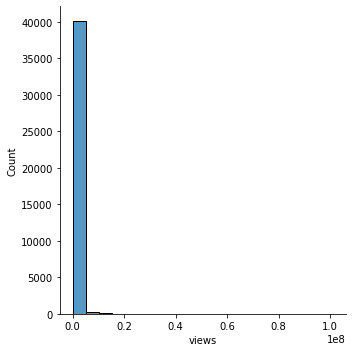

In [19]:
trends_MX = df_countries["MX"]
sns.displot(trends_MX, x="views", bins=20)
plt.show()

In [20]:
trends_MX_notso = trends_MX.loc[trends_MX.views < 1e6, :]

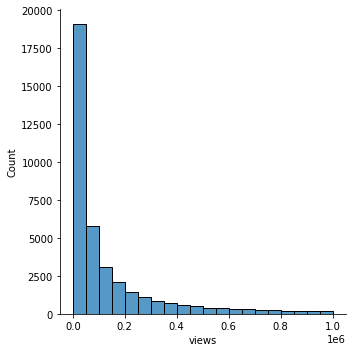

In [21]:
sns.displot(trends_MX_notso, x="views", bins=20)
plt.show()

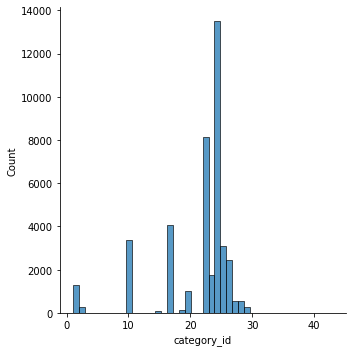

In [22]:
sns.displot(trends_MX, x="category_id", bins=44)
plt.show()

### Distribuciones de probabilidad

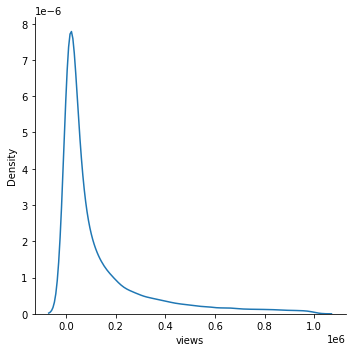

In [23]:
sns.displot(trends_MX_notso, x="views", kind="kde")
plt.show()

### Medidas de tendencia central

In [24]:
trends_MX.views.values.mean()

342381.9681590072

### Medidas de dispersión

In [25]:
trends_MX.views.values.var()

2940091446905.408

## Estadísticas multivariantes

### Correlación

In [26]:
np.corrcoef(trends_MX.views, trends_MX.likes)

array([[1.        , 0.79875128],
       [0.79875128, 1.        ]])

### Comparación

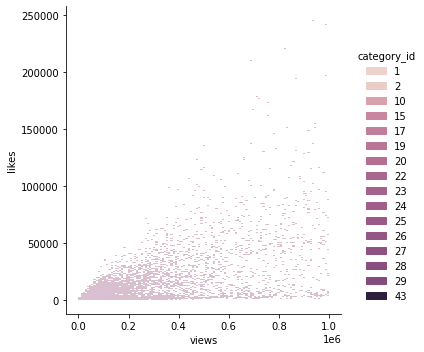

In [29]:
sns.displot(trends_MX_notso, x="views", y="likes", hue="category_id")
plt.show()